<font color="#CA0032"><h1 align="left">**Redes recurrentes profundas**</h1></font>

<font color="#6E6E6E"><h1 align="left">**Predicción de series temporales**</h1></font>

<h2 align="left">---</h2>

<font color="#6E6E6E"><h2 align="left">--</h2></font>

**Notebook: **

**Modificaciones: Francisco**

### **Usaremos un esquema many to one:**

<img src="https://drive.google.com/uc?export=download&id=1iokh576AiK2iFhftPogSBsNXixAi-LBg" align="center" style="float" width="500">

In [ ]:
COLAB = True

## <font color="#CA3532"> **1. Importar librerías**

In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, GRU
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as R2_score

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import os

# fijo la semilla aleatoria por reproducibilidad
np.random.seed(7)

In [ ]:
def download_file_from_google_drive(file_id, dest_file, unzip=False):
  aux = "'https://drive.usercontent.google.com/download?id={}&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280'".format(file_id)
  !wget $aux -O $dest_file
  if unzip:
    !unzip -qq -o $dest_file
    !rm $dest_file

## <font color="#CA3532"> **2. Carga de datos**

In [ ]:
!ls "/content/drive/MyDrive/PC4/data/"

ls: cannot access '/content/drive/MyDrive/PC4/data/': No such file or directory


In [ ]:
!ls

datos_diarios_tienda1.csv  model_current_best.h5	  __pycache__
drive			   my_utils_series_temporales.py  sample_data
__MACOSX		   predicciones.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# === Cargar dataset procesado desde tu carpeta Fracis===
# Ruta al fichero en tu drive/proyecto
data = pd.read_csv('/content/drive/MyDrive/Master_Inteligencia_Artificial_MBIT/Proyectos Consolidación/PC4 Series Temporales/datos_diarios_tienda1 (con mes).csv')


# Vista rápida
data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Month
0,6,2,2013-01-01,0.0,0.0,0,0,1,0,1,0,0,0
1,6,3,2013-01-02,6089.0,781.0,1,0,1,1,0,0,0,0
2,6,4,2013-01-03,5398.0,689.0,1,0,0,1,0,0,0,0
3,6,5,2013-01-04,6092.0,724.0,1,0,0,1,0,0,0,0
4,6,6,2013-01-05,3872.0,467.0,1,0,0,1,0,0,0,0
5,6,7,2013-01-06,0.0,0.0,0,0,0,1,0,0,0,0
6,6,1,2013-01-07,8591.0,947.0,1,1,0,1,0,0,0,0
7,6,2,2013-01-08,7099.0,774.0,1,1,0,1,0,0,0,0
8,6,3,2013-01-09,6749.0,834.0,1,1,0,1,0,0,0,0
9,6,4,2013-01-10,6282.0,737.0,1,1,0,1,0,0,0,0


In [ ]:
# cargamos datos con el fichero datos_diarios_tienda1 (con mes)

#if COLAB:
    #download_file_from_google_drive(file_id='1UBusc964TXPGEI6ZdPy57jRv7Cqu6ib4', dest_file='./datos_diarios_tienda1.csv')

#data = pd.read_csv('datos_diarios_tienda1.csv')
#data.head(20)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,881.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
DayOfWeek,881.0,4.003405,1.999713,1.0,2.0,4.0,6.0,7.0
Sales,881.0,4598.876277,2558.973283,0.0,3411.0,5079.0,6389.0,11139.0
Customers,881.0,530.849035,284.254925,0.0,399.0,605.0,737.0,1111.0
Open,881.0,0.825199,0.380013,0.0,1.0,1.0,1.0,1.0
Promo,881.0,0.380250,0.485724,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,881.0,0.178207,0.382904,0.0,0.0,0.0,0.0,1.0
StateHoliday_0,881.0,0.965948,0.181466,0.0,1.0,1.0,1.0,1.0
StateHoliday_a,881.0,0.022701,0.149035,0.0,0.0,0.0,0.0,1.0
StateHoliday_b,881.0,0.006810,0.082291,0.0,0.0,0.0,0.0,1.0


In [ ]:
!ls "/content/drive/MyDrive/PC4/data/"
#verificamos que tenemos utilidades de series y el nuevo fichero

ls: cannot access '/content/drive/MyDrive/PC4/data/': No such file or directory


In [ ]:
data.shape

(881, 13)

## <font color="#CA3532"> **3. Preprocesado inicial y visualización de datos**

In [ ]:
type(data['Date'][0])

str

In [ ]:
# La fecha es un string, la pasamos a formato fecha de pandas:
data['Date'] = pd.to_datetime(data['Date'])
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
data['Date']

,Date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
876,2015-05-27
877,2015-05-28
878,2015-05-29
879,2015-05-30


In [ ]:
#convierte cada columna del dataframe en array de NumPy, aquí está la key de todo, vamos a usar para los arrays datos min y cortos
fechas      = data['Date'].values
target      = data['Sales'].values.astype(float)

dow         = data['DayOfWeek'].values.astype(int)   # categórica (0–6)
is_open     = data['Open'].values.astype(float)      # binaria 0/1
is_promo    = data['Promo'].values.astype(float)     # binaria 0/1

sch_hdy     = data['SchoolHoliday'].values.astype(float)
st_hdy_0    = data['StateHoliday_0'].values.astype(float)
st_hdy_a    = data['StateHoliday_a'].values.astype(float)
st_hdy_b    = data['StateHoliday_b'].values.astype(float)
st_hdy_c    = data['StateHoliday_c'].values.astype(float)

month       = data['Month'].values.astype(int)       # categórica (0–11) aunque luego no la meteremos como serie

In [ ]:
dow = dow - 1

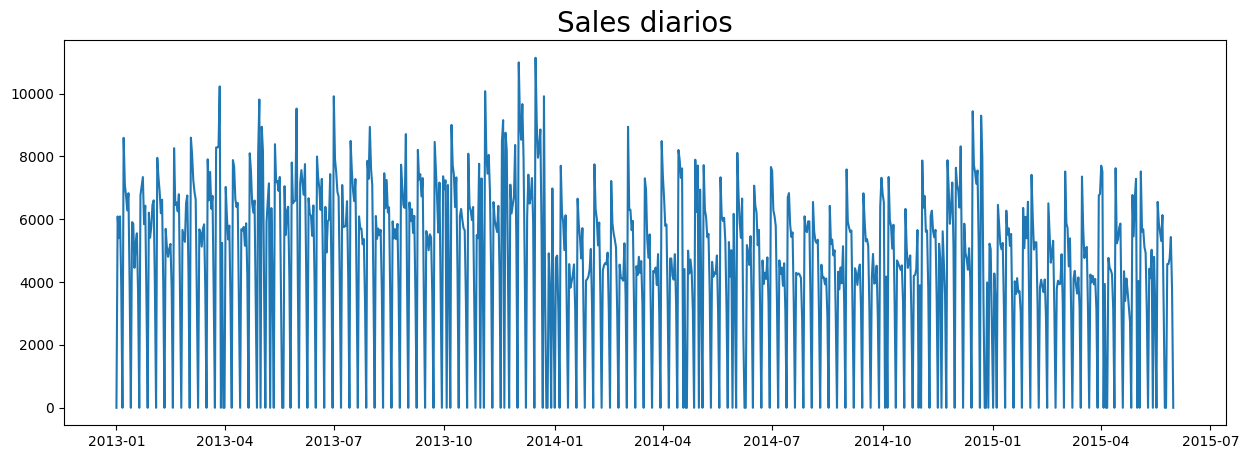

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas, target)
plt.title('Sales diarios',
          fontsize=20);

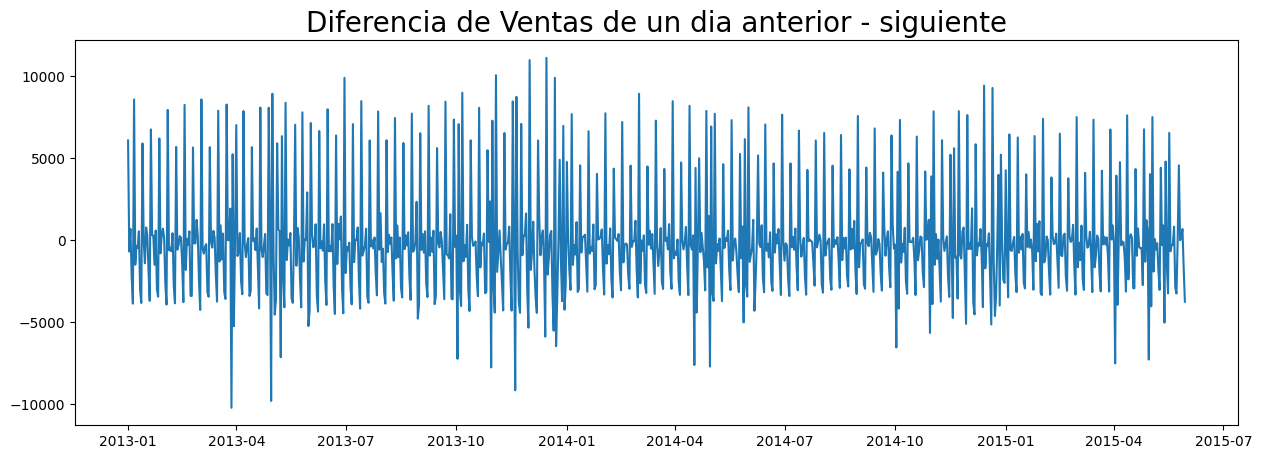

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas[:-1], np.diff(target))
plt.title('Diferencia de Ventas de un dia anterior - siguiente',
          fontsize=20);

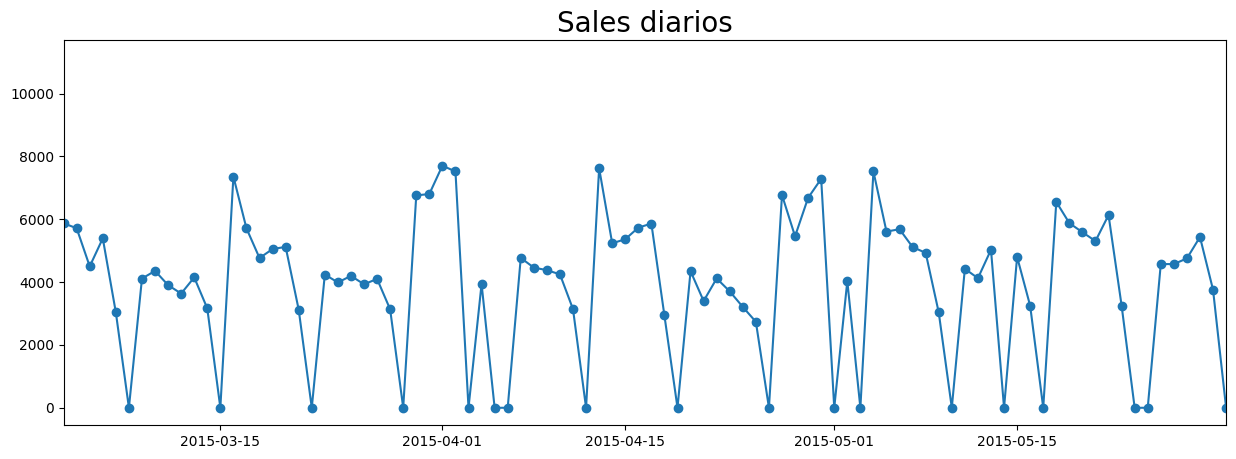

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas, target, 'o-')
plt.title('Sales diarios', fontsize=20)
plt.xlim([fechas[-90],fechas[-1]]);

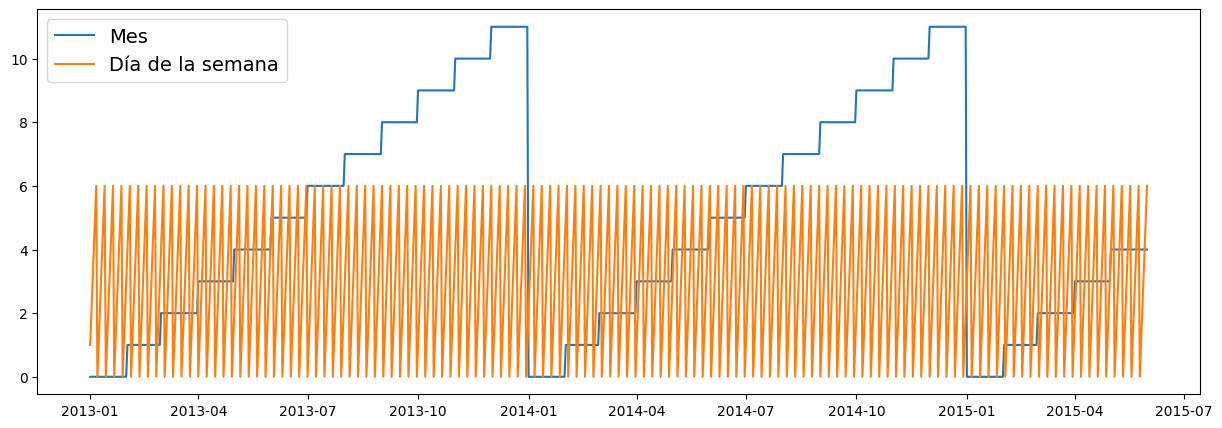

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas, month, label='Mes')
plt.plot(fechas, dow, label='Día de la semana')
plt.legend(fontsize=14);

Sales media   : 4598.876276958003


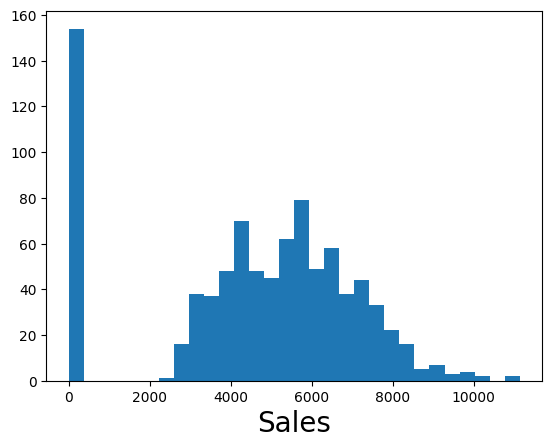

In [ ]:
plt.hist(target, bins=30)
plt.xlabel('Sales', fontsize=20)
print("Sales media   :", target.mean())

## <font color="#CA3532"> **4. Transformación de la variable a predecir**

In [ ]:
# este esclado con las funciones LOS CAMBIAREMOS  por las formulas de skinlearn con los datos de train y haremos lo propio con fit.transform
# Transformación de escala (ajustar el factor en función del problema)
# def transform(x):
#     return x/5000
# def inverse_transform(x_escalado):
#     return x_escalado*5000


# Transformación de la variable a predecir (versión identidad)
import numpy as np

def transform(x):
    # No hace nada: deja pasar el array tal cual.
    return np.asarray(x)

def inverse_transform(x):
    # Idem; no se usa para el target (usaremos y_scaler luego).
    return np.asarray(x)


## <font color="#CA3532"> **5. Enventanado de datos**

In [ ]:
# vamos a coger al carpeta´s Manu las herramientas de my_utils_series_temporales.py.zip Debemos ponerlo en MyDriveFrancisco
if COLAB:
    download_file_from_google_drive(file_id='1OKWTgmKMs8XgqgynxdqVv2YKM9U94feU',
                                    dest_file='./my_utils_series_temporales.py.zip', unzip=True)
#https://drive.google.com/file/d/1OKWTgmKMs8XgqgynxdqVv2YKM9U94feU/view?usp=sharing

--2025-09-13 18:38:06--  https://drive.usercontent.google.com/download?id=1LYuVxpFdsoxgl89tku6BtEH3HuYcGd2g&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010 (2.0K) [application/octet-stream]
Saving to: ‘./my_utils_series_temporales.py.zip’

./my_utils_series_t 100%[===================>]   1.96K  --.-KB/s    in 0s      

2025-09-13 18:38:08 (34.3 MB/s) - ‘./my_utils_series_temporales.py.zip’ saved [2010/2010]



In [ ]:
from my_utils_series_temporales import int2dummy, enventanar, info_enventanado, NAN

In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,881.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0
DayOfWeek,881.0,4.003405,1.0,2.0,4.0,6.0,7.0,1.999713
Date,881,2014-03-17 00:00:00.000000256,2013-01-01 00:00:00,2013-08-09 00:00:00,2014-03-17 00:00:00,2014-10-23 00:00:00,2015-05-31 00:00:00,NaN
Sales,881.0,4598.876277,0.0,3411.0,5079.0,6389.0,11139.0,2558.973283
Customers,881.0,530.849035,0.0,399.0,605.0,737.0,1111.0,284.254925
Open,881.0,0.825199,0.0,1.0,1.0,1.0,1.0,0.380013
Promo,881.0,0.38025,0.0,0.0,0.0,1.0,1.0,0.485724
SchoolHoliday,881.0,0.178207,0.0,0.0,0.0,0.0,1.0,0.382904
StateHoliday_0,881.0,0.965948,0.0,1.0,1.0,1.0,1.0,0.181466
StateHoliday_a,881.0,0.022701,0.0,0.0,0.0,0.0,1.0,0.149035


In [ ]:
# en int2dummy el máximo marcado como entrada es un valor legal
# posiblemente cambiemos semana por prox_fin_mes pero será continua, usaremos dow 0..6 month 0..11 o mes ojo como nombramos en los arrays
# One-hot encoding únicamente para Month (0..11)
# Nota: int2dummy incluye el valor máximo, por eso ponemos 0, 11
one_hot_month = int2dummy(month, 0, 11)
one_hot_day_of_week = int2dummy(dow, 0, 6)

print(month.shape)          # (n,)
print(one_hot_month.shape)  # (n, 12)
print(one_hot_month[:5])    # vistazo a las primeras filas
print(dow.shape)            # (n,)
print(one_hot_day_of_week.shape)  # (n, 7)
one_hot_day_of_week[:5]     # vistazo a las primeras filas

(881,)
(881, 12)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(881,)
(881, 7)


array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]])

In [ ]:
month.shape

(881,)

In [ ]:
#desplegamos como se ha codificado mes hasta 12 columnas con 790 instancias
one_hot_month

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#vemos la shape para las 3 variables codificadas, semana es altura de mes en el que está, en nuesto caso 2 variables mes 0..11 dow 0..6
print(one_hot_month.shape, one_hot_day_of_week.shape)

(881, 12) (881, 7)


In [ ]:
# 1) Target sin escalar aquí
target_transf = transform(target)

# 2) Construcción de 'series' con los arrays disponibles
series = [
    target_transf,  # 0 - TARGET
    is_open,        # 1
    is_promo,       # 1
    sch_hdy,        # 3
    st_hdy_0,       # 4
    st_hdy_a,       # 5
    st_hdy_b,       # 6
    st_hdy_c,       # 7***
]

nombres_series = [
    "target_transf",
    "is_open", "is_promo", "schoolholiday",
    "StateHoliday_0", "StateHoliday_a", "StateHoliday_b", "StateHoliday_c",
]

# 3) Se_saben_antes: False solo para target
se_saben_antes = [
    False,   # target
    True, True, True,            # open/promo/schoolholiday
    True, True, True, True,      # stateholidays
]

# 4) Convertir todo a float32 (Keras feliz)
series = [np.asarray(s, dtype=np.float32) for s in series]

print(len(series), len(nombres_series), len(se_saben_antes))

8 8 8


In [ ]:
# agregamos las columnas que hemos creado con ohe OJO NO CORRER DOS veces porque agregamos más columnas de las necesarias
for i in range(one_hot_month.shape[1]):
    series.append(one_hot_month[:, i])
    nombres_series.append(f"month_{i}")
    se_saben_antes.append(True)

for i in range(one_hot_day_of_week.shape[1]):
    series.append(one_hot_day_of_week[:,i])
    nombres_series.append("day"+str(i+1))
    se_saben_antes.append(True)

print(len(series), len(nombres_series), len(se_saben_antes))

27 27 27


In [ ]:
# target_transf = transform(target)

# series = [target_transf, festivo]
# se_saben_antes = [False, True]   #decimos si se sabe antes o no para crear ventana con +1 lag adelantando el dato
# nombres_series = ["target_transf", "festivo"]  #importante aquí vamos creando la lista con los nombres que tendremos en las variables (features) vamos a ponerlo en mayusculas

# # Variables calendario sobre las que hemos hecho one-hot encoding
# for i in range(one_hot_mes.shape[1]):
#     series.append(one_hot_mes[:,i])
#     nombres_series.append("mes"+str(i+1))
#     se_saben_antes.append(True)

# for i in range(one_hot_semana.shape[1]):
#     series.append(one_hot_semana[:,i])
#     nombres_series.append("semana"+str(i+1))
#     se_saben_antes.append(True)

# for i in range(one_hot_day_of_week.shape[1]):
#     series.append(one_hot_day_of_week[:,i])
#     nombres_series.append("day"+str(i+1))
#     se_saben_antes.append(True)

In [ ]:
#comprobamos que tenemos más columnas (variables) y que seguimos con el mismo número de instancias
print(np.shape(series))
print(np.shape(se_saben_antes))

(27, 881)
(27,)


In [ ]:
lookback = 7 # lookback es otro sinónimo de W_in

# target=0 en siguiente línea quiere decir cuál es el índice del target en objeto "series":
X, y = enventanar(series, target=0, se_saben_antes=se_saben_antes,
                  W_in=lookback)

print(X.shape, np.shape(y))

(881, 7, 27) (881,)


In [ ]:
info_enventanado(X[:10],y[:10],
                 nombres_series=nombres_series,
                 nombre_target="target",
                 tiempos=fechas)

10 ventanas creadas

X.shape=(10, 7, 27)  Y.shape=(10,) 

 Ventana 0: 


,?0,?1,?2,?3,?4,?5,?6
target_transf,nan,nan,nan,nan,nan,nan,nan
is_open,nan,nan,nan,nan,nan,nan,0.000000
is_promo,nan,nan,nan,nan,nan,nan,0.000000
schoolholiday,nan,nan,nan,nan,nan,nan,1.000000
StateHoliday_0,nan,nan,nan,nan,nan,nan,0.000000
StateHoliday_a,nan,nan,nan,nan,nan,nan,1.000000
StateHoliday_b,nan,nan,nan,nan,nan,nan,0.000000
StateHoliday_c,nan,nan,nan,nan,nan,nan,0.000000
month_0,nan,nan,nan,nan,nan,nan,1.000000
month_1,nan,nan,nan,nan,nan,nan,0.000000


 Ventana 1: 


,?0,?1,?2,?3,?4,?5,2013-01-01T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,nan,0.000000
is_open,nan,nan,nan,nan,nan,0.000000,1.000000
is_promo,nan,nan,nan,nan,nan,0.000000,0.000000
schoolholiday,nan,nan,nan,nan,nan,1.000000,1.000000
StateHoliday_0,nan,nan,nan,nan,nan,0.000000,1.000000
StateHoliday_a,nan,nan,nan,nan,nan,1.000000,0.000000
StateHoliday_b,nan,nan,nan,nan,nan,0.000000,0.000000
StateHoliday_c,nan,nan,nan,nan,nan,0.000000,0.000000
month_0,nan,nan,nan,nan,nan,1.000000,1.000000
month_1,nan,nan,nan,nan,nan,0.000000,0.000000


 Ventana 2: 


,?0,?1,?2,?3,?4,2013-01-01T00:00:00.000000000,2013-01-02T00:00:00.000000000
target_transf,nan,nan,nan,nan,nan,0.000000,6089.000000
is_open,nan,nan,nan,nan,0.000000,1.000000,1.000000
is_promo,nan,nan,nan,nan,0.000000,0.000000,0.000000
schoolholiday,nan,nan,nan,nan,1.000000,1.000000,0.000000
StateHoliday_0,nan,nan,nan,nan,0.000000,1.000000,1.000000
StateHoliday_a,nan,nan,nan,nan,1.000000,0.000000,0.000000
StateHoliday_b,nan,nan,nan,nan,0.000000,0.000000,0.000000
StateHoliday_c,nan,nan,nan,nan,0.000000,0.000000,0.000000
month_0,nan,nan,nan,nan,1.000000,1.000000,1.000000
month_1,nan,nan,nan,nan,0.000000,0.000000,0.000000


 Ventana 3: 


,?0,?1,?2,?3,2013-01-01T00:00:00.000000000,2013-01-02T00:00:00.000000000,2013-01-03T00:00:00.000000000
target_transf,nan,nan,nan,nan,0.000000,6089.000000,5398.000000
is_open,nan,nan,nan,0.000000,1.000000,1.000000,1.000000
is_promo,nan,nan,nan,0.000000,0.000000,0.000000,0.000000
schoolholiday,nan,nan,nan,1.000000,1.000000,0.000000,0.000000
StateHoliday_0,nan,nan,nan,0.000000,1.000000,1.000000,1.000000
StateHoliday_a,nan,nan,nan,1.000000,0.000000,0.000000,0.000000
StateHoliday_b,nan,nan,nan,0.000000,0.000000,0.000000,0.000000
StateHoliday_c,nan,nan,nan,0.000000,0.000000,0.000000,0.000000
month_0,nan,nan,nan,1.000000,1.000000,1.000000,1.000000
month_1,nan,nan,nan,0.000000,0.000000,0.000000,0.000000


 Ventana 4: 


,?0,?1,?2,2013-01-01T00:00:00.000000000,2013-01-02T00:00:00.000000000,2013-01-03T00:00:00.000000000,2013-01-04T00:00:00.000000000
target_transf,nan,nan,nan,0.000000,6089.000000,5398.000000,6092.000000
is_open,nan,nan,0.000000,1.000000,1.000000,1.000000,1.000000
is_promo,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000
schoolholiday,nan,nan,1.000000,1.000000,0.000000,0.000000,0.000000
StateHoliday_0,nan,nan,0.000000,1.000000,1.000000,1.000000,1.000000
StateHoliday_a,nan,nan,1.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_b,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_c,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000
month_0,nan,nan,1.000000,1.000000,1.000000,1.000000,1.000000
month_1,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 5: 


,?0,?1,2013-01-01T00:00:00.000000000,2013-01-02T00:00:00.000000000,2013-01-03T00:00:00.000000000,2013-01-04T00:00:00.000000000,2013-01-05T00:00:00.000000000
target_transf,nan,nan,0.000000,6089.000000,5398.000000,6092.000000,3872.000000
is_open,nan,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
is_promo,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
schoolholiday,nan,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_0,nan,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
StateHoliday_a,nan,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_b,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_c,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_0,nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
month_1,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 6: 


,?0,2013-01-01T00:00:00.000000000,2013-01-02T00:00:00.000000000,2013-01-03T00:00:00.000000000,2013-01-04T00:00:00.000000000,2013-01-05T00:00:00.000000000,2013-01-06T00:00:00.000000000
target_transf,nan,0.000000,6089.000000,5398.000000,6092.000000,3872.000000,0.000000
is_open,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
is_promo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
schoolholiday,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
StateHoliday_a,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
month_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 7: 


,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00
target_transf,0.000000,6089.000000,5398.000000,6092.000000,3872.000000,0.000000,8591.000000
is_open,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
is_promo,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
schoolholiday,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
StateHoliday_a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
month_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 8: 


,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00
target_transf,6089.000000,5398.000000,6092.000000,3872.000000,0.000000,8591.000000,7099.000000
is_open,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
is_promo,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
schoolholiday,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
StateHoliday_a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
month_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 9: 


,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00
target_transf,5398.000000,6092.000000,3872.000000,0.000000,8591.000000,7099.000000,6749.000000
is_open,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
is_promo,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
schoolholiday,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
StateHoliday_a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StateHoliday_c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
month_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
print(X.shape)
print(np.shape(target))

(881, 7, 27)
(881,)


## <font color="#CA3532"> **6. Separación training-test** y además aplicaremos el MinMax escaler a los datos de Sales

In [ ]:
train_perc  = .8
punto_corte = int(len(X)*train_perc)

In [ ]:
X_train      = X[lookback:punto_corte]      # elimino los lookback primeros al tener NANs
y_train      = y[lookback:punto_corte]      # elimino los lookback primeros al tener NANs
target_train = target[lookback:punto_corte] # elimino los lookback primeros al tener NANs
fechas_train = fechas[lookback:punto_corte] # elimino los lookback primeros al tener NANs

X_test       = X[punto_corte:]
y_test       = y[punto_corte:]
target_test  = target[punto_corte:]
fechas_test  = fechas[punto_corte:]

print(np.shape(target_train))
print(np.shape(target_test))

(697,)
(177,)


In [ ]:
690+177+14

881

In [ ]:
print(X_train.shape, y_train.shape)

(697, 7, 27) (697,)


In [ ]:
# aquí aplicaremos a la columna de Sales un MinMax es un escalador en condiciones para -1..1

In [ ]:
# === Escalado correcto del TARGET (fit SOLO con TRAIN) ===
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

#y_scaler = MinMaxScaler()
y_scaler = StandardScaler()

# 1) Ajustar con y_train (en bruto)
y_scaler.fit(y_train.reshape(-1, 1))

# 2) Transformar y (train/test)
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test  = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

# 3) Coherencia: escalar también el CANAL 0 de X (histórico del target)
#    (para que lo que ve la red en X y lo que predice en y estén en la MISMA escala)
X_train = X_train.copy()
X_test  = X_test.copy()

X_train[:,:,0] = y_scaler.transform(X_train[:,:,0].reshape(-1, 1)) \
                           .reshape(X_train.shape[0], X_train.shape[1])
X_test[:,:,0]  = y_scaler.transform(X_test[:,:,0].reshape(-1, 1)) \
                           .reshape(X_test.shape[0],  X_test.shape[1])

# 4) Utilidad para desescalar predicciones más adelante
def inverse_transform_y(x):
    return y_scaler.inverse_transform(np.asarray(x).reshape(-1,1)).ravel()

# 5) (Recomendado) Asegurar dtypes para Keras
X_train = X_train.astype('float32');  y_train = y_train.astype('float32')
X_test  = X_test.astype('float32');   y_test  = y_test.astype('float32')


Revisamos las variables que entrarán al modelo y la escala en la que estarán (para verificar rangos de -1..1

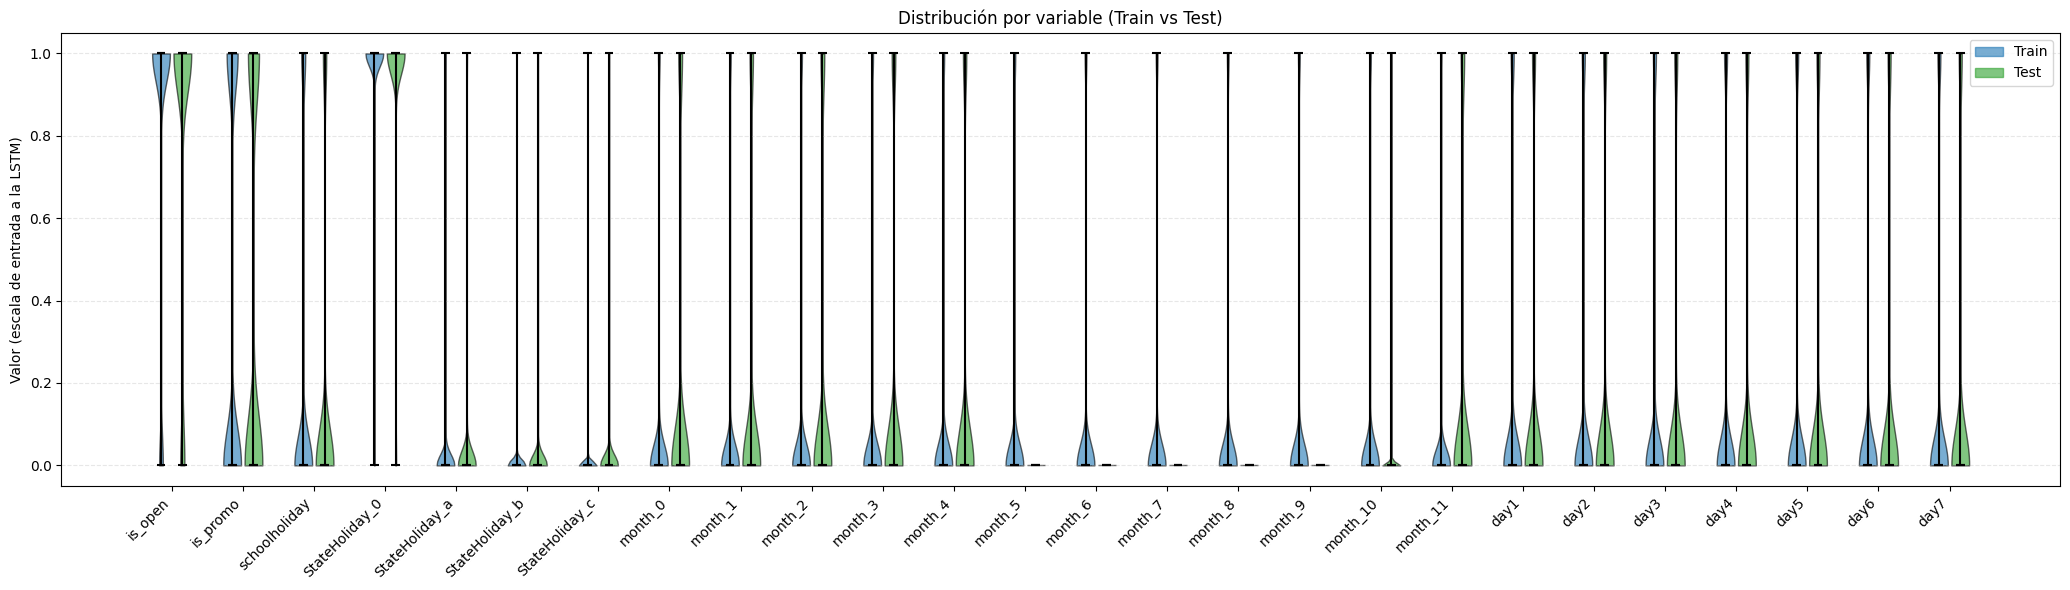

In [ ]:
# Violin plots of each feature (excluding target channel 0) with Train (blue) vs Test (green).
# Assumes variables available in the notebook: X_train, X_test, nombres_series

import numpy as np
import matplotlib.pyplot as plt

# Safety checks & setup
assert 'X_train' in globals() and 'X_test' in globals(), "X_train / X_test no encontrados."
assert 'nombres_series' in globals(), "nombres_series no encontrado."

# X shapes: (N, lookback, n_vars)
n_vars = X_train.shape[2]
feature_names = nombres_series  # length should be n_vars

# Build flattened distributions per feature excluding target (channel 0)
train_dists = []
test_dists  = []
labels      = []

for j in range(1, n_vars):  # exclude target at index 0
    # Flatten across (samples, timesteps)
    tr = X_train[:, :, j].reshape(-1)
    te = X_test[:,  :, j].reshape(-1)
    # Drop NaNs/Infs just in case
    tr = tr[np.isfinite(tr)]
    te = te[np.isfinite(te)]
    train_dists.append(tr)
    test_dists.append(te)
    labels.append(feature_names[j] if j < len(feature_names) else f"var_{j}")

# Positions for side-by-side violins
x = np.arange(len(labels))
offset = 0.15

fig = plt.figure(figsize=(max(10, len(labels)*0.8), 6))
ax = fig.add_subplot(1,1,1)

parts_tr = ax.violinplot(train_dists, positions=x - offset, widths=0.25, showmeans=False, showextrema=True, showmedians=True)
parts_te = ax.violinplot(test_dists,  positions=x + offset, widths=0.25, showmeans=False, showextrema=True, showmedians=True)

# Color styling per user request: Train blue, Test green
for pc in parts_tr['bodies']:
    pc.set_facecolor('tab:blue')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)
parts_tr['cmedians'].set_color('black')
parts_tr['cbars'].set_color('black')
parts_tr['cmins'].set_color('black')
parts_tr['cmaxes'].set_color('black')

for pc in parts_te['bodies']:
    pc.set_facecolor('tab:green')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)
parts_te['cmedians'].set_color('black')
parts_te['cbars'].set_color('black')
parts_te['cmins'].set_color('black')
parts_te['cmaxes'].set_color('black')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_title('Distribución por variable (Train vs Test)')
ax.set_ylabel('Valor (escala de entrada a la LSTM)')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)

# Manual legend
import matplotlib.patches as mpatches
blue_patch  = mpatches.Patch(color='tab:blue', alpha=0.6, label='Train')
green_patch = mpatches.Patch(color='tab:green', alpha=0.6, label='Test')
ax.legend(handles=[blue_patch, green_patch])

plt.tight_layout()
plt.show()

Verificamos la escala en la que tenemos y_train test

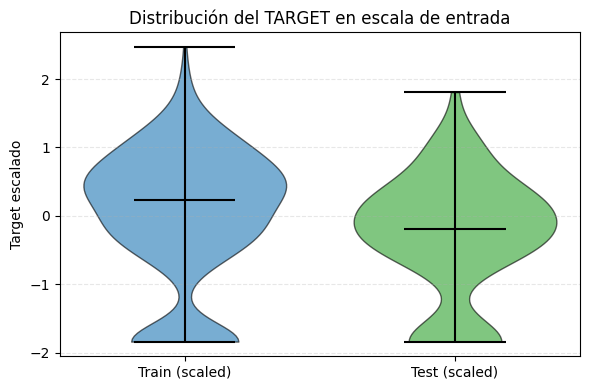

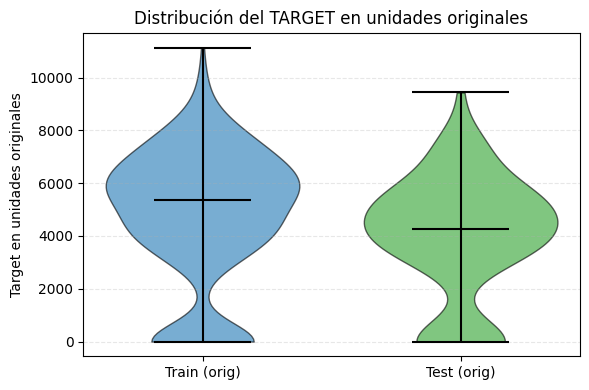

In [ ]:
# Violin plots for TARGET series: Train vs Test
# Assumes variables available: y_train, y_test (scaled), target_train, target_test (original), and y_scaler for inverse_transform

import numpy as np
import matplotlib.pyplot as plt

# Determine availability
have_scaled = 'y_train' in globals() and 'y_test' in globals()
have_original = 'target_train' in globals() and 'target_test' in globals()

if not have_scaled and not have_original:
    raise RuntimeError("No se encontraron ni y_train/y_test (escalados) ni target_train/target_test (originales).")

# 1) Violin plot en ESCALA DEL MODELO (si existe)
if have_scaled:
    fig1 = plt.figure(figsize=(6,4))
    ax1 = fig1.add_subplot(1,1,1)
    positions = [0.9, 1.1]
    parts_tr = ax1.violinplot([y_train], positions=[positions[0]], widths=0.15, showmedians=True, showextrema=True)
    parts_te = ax1.violinplot([y_test],  positions=[positions[1]], widths=0.15, showmedians=True, showextrema=True)

    # Colores
    for pc in parts_tr['bodies']:
        pc.set_facecolor('tab:blue'); pc.set_edgecolor('black'); pc.set_alpha(0.6)
    parts_tr['cmedians'].set_color('black'); parts_tr['cbars'].set_color('black'); parts_tr['cmins'].set_color('black'); parts_tr['cmaxes'].set_color('black')

    for pc in parts_te['bodies']:
        pc.set_facecolor('tab:green'); pc.set_edgecolor('black'); pc.set_alpha(0.6)
    parts_te['cmedians'].set_color('black'); parts_te['cbars'].set_color('black'); parts_te['cmins'].set_color('black'); parts_te['cmaxes'].set_color('black')

    ax1.set_xticks(positions)
    ax1.set_xticklabels(['Train (scaled)', 'Test (scaled)'])
    ax1.set_ylabel('Target escalado')
    ax1.set_title('Distribución del TARGET en escala de entrada')
    ax1.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 2) Violin plot en UNIDADES ORIGINALES (si existe o si podemos invertir)
if have_original:
    tr = np.asarray(target_train).reshape(-1)
    te = np.asarray(target_test).reshape(-1)
elif have_scaled and 'y_scaler' in globals():
    # Invertimos a unidades originales usando el scaler del target
    tr = y_scaler.inverse_transform(np.asarray(y_train).reshape(-1,1)).reshape(-1)
    te = y_scaler.inverse_transform(np.asarray(y_test).reshape(-1,1)).reshape(-1)
else:
    tr = None; te = None

if tr is not None and te is not None:
    fig2 = plt.figure(figsize=(6,4))
    ax2 = fig2.add_subplot(1,1,1)
    positions = [0.9, 1.1]
    parts_tr = ax2.violinplot([tr], positions=[positions[0]], widths=0.15, showmedians=True, showextrema=True)
    parts_te = ax2.violinplot([te], positions=[positions[1]], widths=0.15, showmedians=True, showextrema=True)

    for pc in parts_tr['bodies']:
        pc.set_facecolor('tab:blue'); pc.set_edgecolor('black'); pc.set_alpha(0.6)
    parts_tr['cmedians'].set_color('black'); parts_tr['cbars'].set_color('black'); parts_tr['cmins'].set_color('black'); parts_tr['cmaxes'].set_color('black')

    for pc in parts_te['bodies']:
        pc.set_facecolor('tab:green'); pc.set_edgecolor('black'); pc.set_alpha(0.6)
    parts_te['cmedians'].set_color('black'); parts_te['cbars'].set_color('black'); parts_te['cmins'].set_color('black'); parts_te['cmaxes'].set_color('black')

    ax2.set_xticks(positions)
    ax2.set_xticklabels(['Train (orig)', 'Test (orig)'])
    ax2.set_ylabel('Target en unidades originales')
    ax2.set_title('Distribución del TARGET en unidades originales')
    ax2.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


## <font color="#CA3532"> **7. Construcción del modelo con Keras**

In [ ]:
#from keras.optimizers import Adam

In [ ]:
#hyperparametros   neurons, dropout
from keras import optimizers

neurons = 5
#DROPOUT = 0.8
#l_r           = 0.0005
#opt = optimizers.RMSprop(learning_rate=l_r)
opt = optimizers.Adam()

model = Sequential()
model.add(LSTM(neurons, input_shape=(lookback, X_train.shape[2]),
               # kernel_regularizer='l1'
               #dropout=DROPOUT,
              )
         )
model.add(Dense(1, # kernel_regularizer='l1'
               )
         )
model.compile(
              loss='mean_squared_error',
              #loss="mean_absolute_error",
              #optimizer='adam',
              optimizer=opt,
              #optimizer=Adam(learning_rate=0.01), # más rápido
              metrics=['mse']) # 'RMSprop'
# mean_absolute_error

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.optimizer.learning_rate

<Variable path=adam/learning_rate, shape=(), dtype=float32, value=0.0010000000474974513>

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 5)              │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 666 (2.60 KB)

 Trainable params: 666 (2.60 KB)

 Non-trainable params: 0 (0.00 B)

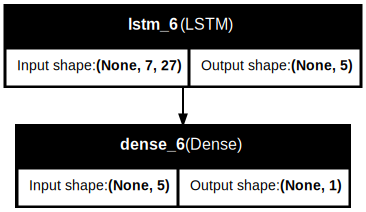

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

if COLAB:
  display(SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog="dot",
                                                                   format="svg")))
else:
  display(SVG(model_to_dot(model, show_shapes=True).create(prog="dot",
                                                           format="svg")))

In [ ]:
def grafica_entrenamiento(tr_mse, val_mse):
    ax=plt.figure(figsize=(10,4)).gca()
    plt.plot(1+np.arange(len(tr_mse)), tr_mse)
    plt.plot(1+np.arange(len(val_mse)), val_mse)
    plt.title('mse del modelo', fontsize=18)
    plt.xlabel('epoca', fontsize=18)
    plt.ylabel('mse', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()


Epoch 1: val_mse improved from inf to 0.77932, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.77932 to 0.76335, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.76335 to 0.75512, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.75512 to 0.74889, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.74889 to 0.74407, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.74407 to 0.73657, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.73657 to 0.72396, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.72396 to 0.71226, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.71226 to 0.70282, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.70282 to 0.68889, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.68889 to 0.67330, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.67330 to 0.65555, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.65555 to 0.63724, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.63724 to 0.62360, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.62360 to 0.60125, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.60125 to 0.58865, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.58865 to 0.57946, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.57946 to 0.56540, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.56540 to 0.53832, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.53832 to 0.51959, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.51959 to 0.50291, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.50291 to 0.48607, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.48607 to 0.47301, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.47301 to 0.45526, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.45526 to 0.44628, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.44628 to 0.43812, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.43812 to 0.42191, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.42191 to 0.41035, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.41035 to 0.40948, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.40948 to 0.40502, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.40502 to 0.39673, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.39673 to 0.38457, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.38457 to 0.38003, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.38003 to 0.37651, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.37651

Epoch 1: val_mse improved from 0.37651 to 0.37021, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.37021 to 0.36845, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.36845 to 0.35512, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.35512 to 0.35263, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.35263

Epoch 1: val_mse improved from 0.35263 to 0.35107, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.35107 to 0.33778, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.33778

Epoch 1: val_mse did not improve from 0.33778

Epoch 1: val_mse did not improve from 0.33778

Epoch 1: val_mse improved from 0.33778 to 0.32702, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.32702 to 0.32114, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.32114

Epoch 1: val_mse did not improve from 0.32114

Epoch 1: val_mse improved from 0.32114 to 0.31802, saving model to model_current_best.h5


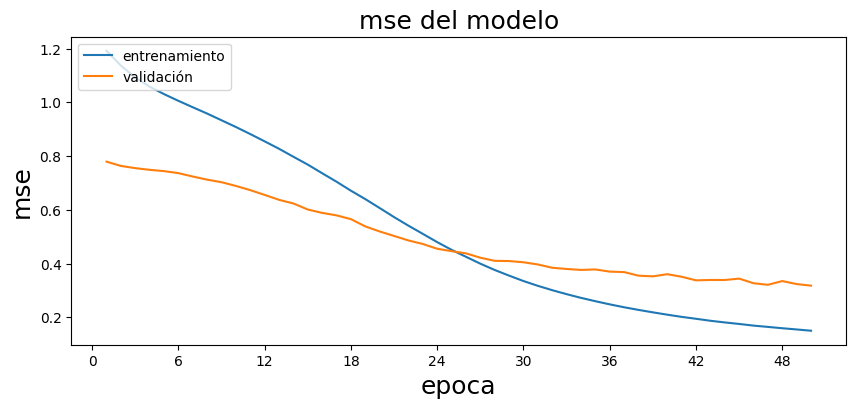


Epoch 1: val_mse improved from 0.31802 to 0.30887, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.30887

Epoch 1: val_mse did not improve from 0.30887

Epoch 1: val_mse improved from 0.30887 to 0.29957, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.29957

Epoch 1: val_mse did not improve from 0.29957

Epoch 1: val_mse improved from 0.29957 to 0.29647, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.29647

Epoch 1: val_mse improved from 0.29647 to 0.29592, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.29592

Epoch 1: val_mse improved from 0.29592 to 0.28693, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.28693 to 0.28215, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.28215

Epoch 1: val_mse improved from 0.28215 to 0.28069, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.28069

Epoch 1: val_mse improved from 0.28069 to 0.26774, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.26774

Epoch 1: val_mse did not improve from 0.26774

Epoch 1: val_mse improved from 0.26774 to 0.25837, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.25837

Epoch 1: val_mse did not improve from 0.25837

Epoch 1: val_mse did not improve from 0.25837

Epoch 1: val_mse improved from 0.25837 to 0.25587, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.25587 to 0.25552, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.25552

Epoch 1: val_mse improved from 0.25552 to 0.25517, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.25517 to 0.24319, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.24319

Epoch 1: val_mse did not improve from 0.24319

Epoch 1: val_mse improved from 0.24319 to 0.24094, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.24094

Epoch 1: val_mse improved from 0.24094 to 0.23773, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.23773 to 0.22595, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.22595

Epoch 1: val_mse did not improve from 0.22595

Epoch 1: val_mse did not improve from 0.22595

Epoch 1: val_mse did not improve from 0.22595

Epoch 1: val_mse improved from 0.22595 to 0.22156, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.22156 to 0.21738, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.21738

Epoch 1: val_mse improved from 0.21738 to 0.21299, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.21299 to 0.20503, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.20503

Epoch 1: val_mse did not improve from 0.20503

Epoch 1: val_mse improved from 0.20503 to 0.20206, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.20206

Epoch 1: val_mse did not improve from 0.20206

Epoch 1: val_mse improved from 0.20206 to 0.20165, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.20165 to 0.19770, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.19770


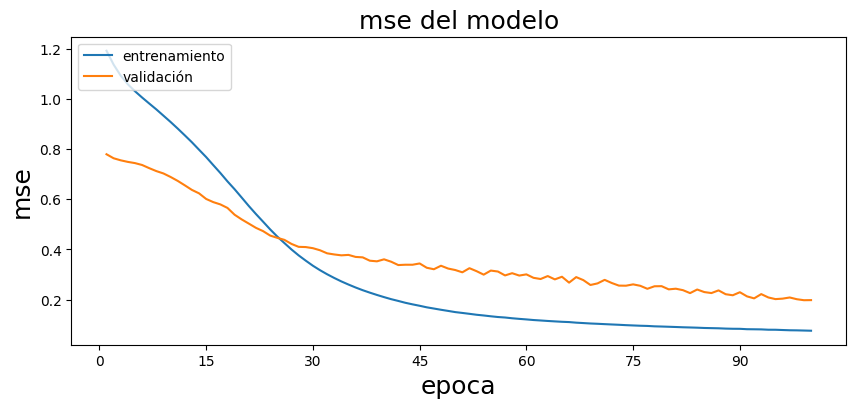


Epoch 1: val_mse did not improve from 0.19770

Epoch 1: val_mse improved from 0.19770 to 0.19549, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.19549 to 0.18622, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.18622

Epoch 1: val_mse did not improve from 0.18622

Epoch 1: val_mse improved from 0.18622 to 0.18388, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.18388

Epoch 1: val_mse improved from 0.18388 to 0.18203, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.18203 to 0.17051, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.17051

Epoch 1: val_mse did not improve from 0.17051

Epoch 1: val_mse did not improve from 0.17051

Epoch 1: val_mse did not improve from 0.17051

Epoch 1: val_mse improved from 0.17051 to 0.16925, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.16925 to 0.16736, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.16736

Epoch 1: val_mse did not improve from 0.16736

Epoch 1: val_mse improved from 0.16736 to 0.16078, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.16078

Epoch 1: val_mse did not improve from 0.16078

Epoch 1: val_mse improved from 0.16078 to 0.15597, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.15597

Epoch 1: val_mse did not improve from 0.15597

Epoch 1: val_mse did not improve from 0.15597

Epoch 1: val_mse did not improve from 0.15597

Epoch 1: val_mse improved from 0.15597 to 0.15426, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.15426

Epoch 1: val_mse improved from 0.15426 to 0.14614, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.14614

Epoch 1: val_mse did not improve from 0.14614

Epoch 1: val_mse improved from 0.14614 to 0.14517, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.14517

Epoch 1: val_mse improved from 0.14517 to 0.13964, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.13964

Epoch 1: val_mse did not improve from 0.13964

Epoch 1: val_mse did not improve from 0.13964

Epoch 1: val_mse did not improve from 0.13964

Epoch 1: val_mse did not improve from 0.13964

Epoch 1: val_mse did not improve from 0.13964

Epoch 1: val_mse did not improve from 0.13964

Epoch 1: val_mse improved from 0.13964 to 0.13730, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.13730

Epoch 1: val_mse did not improve from 0.13730

Epoch 1: val_mse improved from 0.13730 to 0.13354, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.13354

Epoch 1: val_mse did not improve from 0.13354

Epoch 1: val_mse improved from 0.13354 to 0.13150, saving model to model_current_best.h5



Epoch 1: val_mse improved from 0.13150 to 0.13073, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.13073

Epoch 1: val_mse improved from 0.13073 to 0.12657, saving model to model_current_best.h5


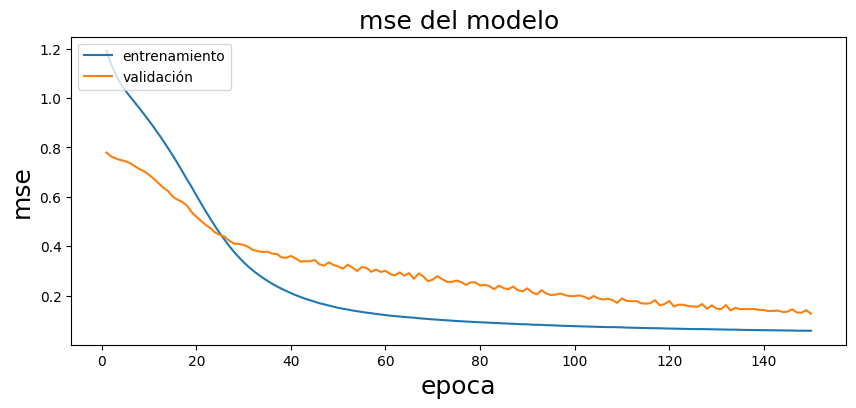


Epoch 1: val_mse did not improve from 0.12657

Epoch 1: val_mse did not improve from 0.12657

Epoch 1: val_mse did not improve from 0.12657

Epoch 1: val_mse did not improve from 0.12657

Epoch 1: val_mse did not improve from 0.12657

Epoch 1: val_mse did not improve from 0.12657

Epoch 1: val_mse improved from 0.12657 to 0.12225, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.12225

Epoch 1: val_mse did not improve from 0.12225

Epoch 1: val_mse did not improve from 0.12225

Epoch 1: val_mse did not improve from 0.12225

Epoch 1: val_mse improved from 0.12225 to 0.11385, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.11385

Epoch 1: val_mse did not improve from 0.11385

Epoch 1: val_mse did not improve from 0.11385

Epoch 1: val_mse did not improve from 0.11385

Epoch 1: val_mse did not improve from 0.11385

Epoch 1: val_mse did not improve from 0.11385

Epoch 1: val_mse did not improve from 0.11385

Epoch 1: val_mse did not improve from 0.11385

Epoch 1: val_mse improved from 0.11385 to 0.10993, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.10993

Epoch 1: val_mse did not improve from 0.10993

Epoch 1: val_mse improved from 0.10993 to 0.10673, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.10673

Epoch 1: val_mse did not improve from 0.10673

Epoch 1: val_mse did not improve from 0.10673

Epoch 1: val_mse did not improve from 0.10673

Epoch 1: val_mse did not improve from 0.10673

Epoch 1: val_mse improved from 0.10673 to 0.10463, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.10463

Epoch 1: val_mse did not improve from 0.10463

Epoch 1: val_mse did not improve from 0.10463

Epoch 1: val_mse did not improve from 0.10463

Epoch 1: val_mse did not improve from 0.10463

Epoch 1: val_mse did not improve from 0.10463

Epoch 1: val_mse did not improve from 0.10463

Epoch 1: val_mse did not improve from 0.10463

Epoch 1: val_mse did not improve from 0.10463

Epoch 1: val_mse improved from 0.10463 to 0.10171, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.10171

Epoch 1: val_mse did not improve from 0.10171

Epoch 1: val_mse did not improve from 0.10171

Epoch 1: val_mse did not improve from 0.10171

Epoch 1: val_mse did not improve from 0.10171

Epoch 1: val_mse did not improve from 0.10171

Epoch 1: val_mse did not improve from 0.10171

Epoch 1: val_mse did not improve from 0.10171

Epoch 1: val_mse improved from 0.10171 to 0.10031, saving model to model_current_best.h5



Epoch 1: val_mse did not improve from 0.10031


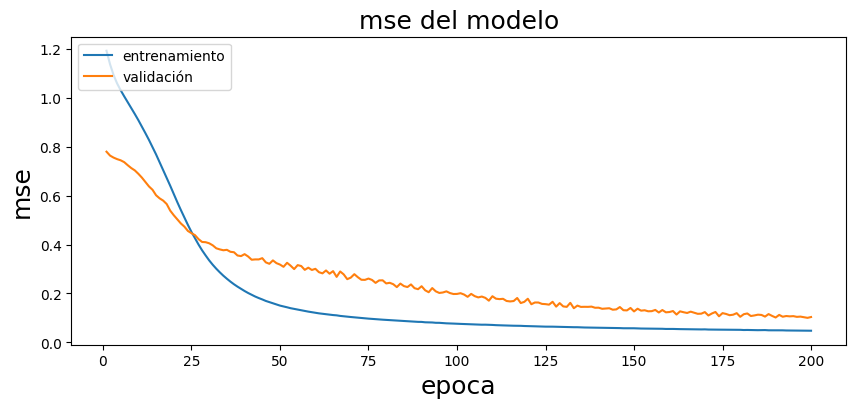

In [ ]:
epochs = 200
batch_size = 64
Nval = 200
control_sobreajuste_val = True

if not control_sobreajuste_val:
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size, verbose=2)
else:
    acum_tr_mse = []
    acum_val_mse = []
    modelpath="model_current_best.h5"
    checkpoint = ModelCheckpoint(modelpath, monitor='val_mse', verbose=2, # val_mean_squared_error
                                 save_best_only=True,
                                 mode='min') # graba sólo los que mejoran en validación

    callbacks_list = [checkpoint]

    for e in range(epochs):
        aux = X_train[:-Nval]
        history = model.fit(aux, y_train[:-Nval],
                            batch_size=batch_size,
                            epochs=1,
                            callbacks=callbacks_list,
                            verbose=0,
                            validation_data=(X_train[-Nval:], y_train[-Nval:]))

        acum_tr_mse  += history.history['mse'] # mean_squared_error
        acum_val_mse += history.history['val_mse'] # val_mean_squared_error

        if (e+1)%50 == 0:
            grafica_entrenamiento(acum_tr_mse, acum_val_mse)

In [ ]:
model = load_model(modelpath) # recupero el mejor modelo en validación

## <font color="#CA3532"> **8. Chequeo del modelo (predicción a un día)**

In [ ]:
y_train_prediction = model.predict(X_train).flatten()
y_test_prediction = model.predict(X_test).flatten()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# aquí cambiamos el desescalamiento
# target_train_pred = inverse_transform(y_train_prediction)
# target_test_pred  = inverse_transform(y_test_prediction)
target_train_pred = inverse_transform_y(y_train_prediction)
target_test_pred  = inverse_transform_y(y_test_prediction)

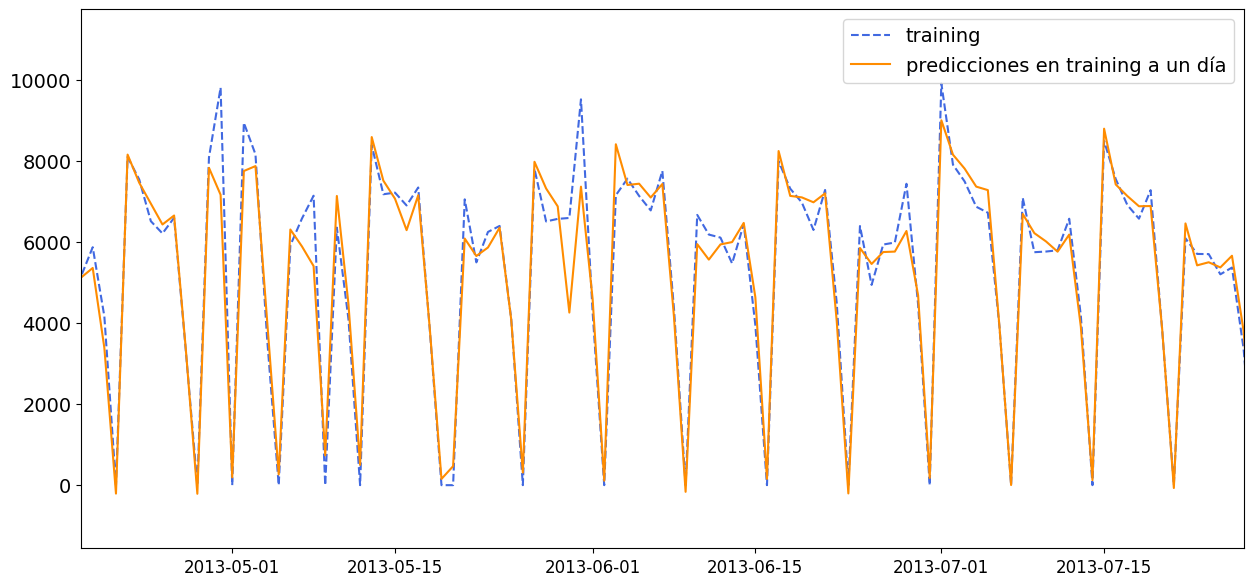

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fechas_train, target_train, '--', c='royalblue',
         label="training")
plt.plot(fechas_train, target_train_pred,  c='darkorange',
         label="predicciones en training a un día")

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlim([fechas_train[100],fechas_train[200]])
plt.legend(fontsize=14);

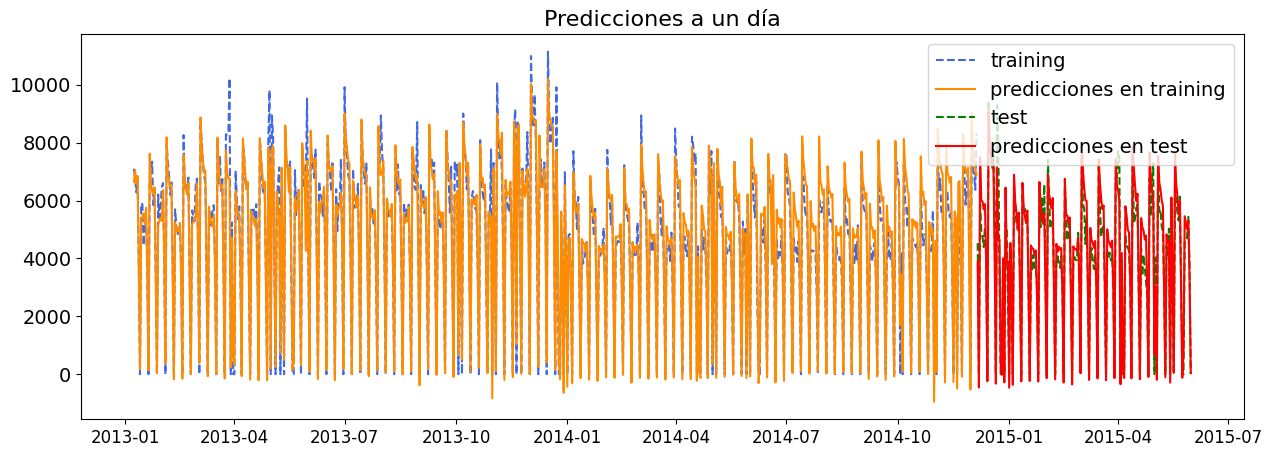

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas_train, target_train, '--', c='royalblue',
         label='training')
plt.plot(fechas_train, target_train_pred,  c='darkorange',
         label='predicciones en training')
plt.plot(fechas_test, target_test, '--',   c='green',
         label='test')
plt.plot(fechas_test, target_test_pred,    c='red',
         label='predicciones en test')
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title('Predicciones a un día', fontsize=16)
plt.legend(fontsize=14);

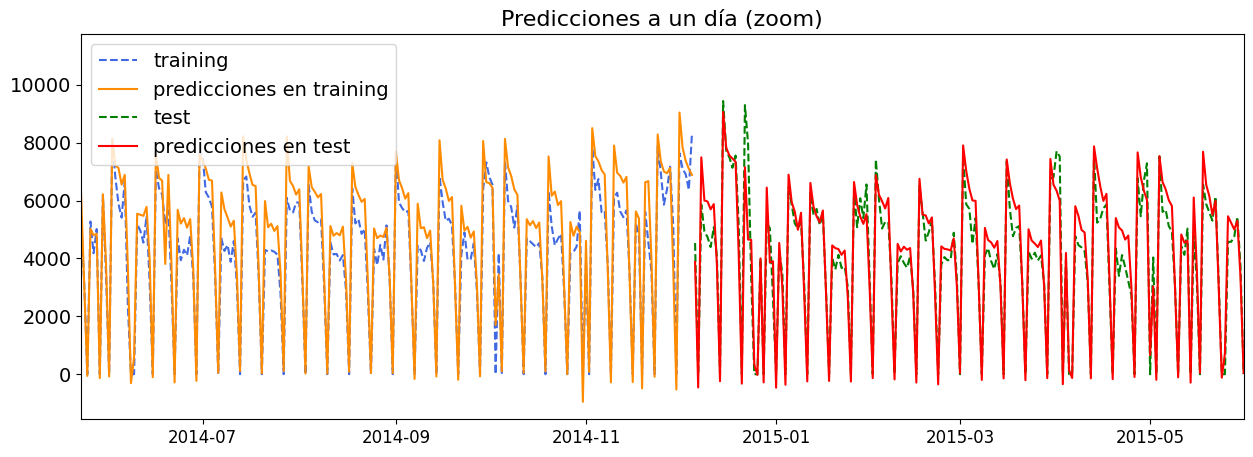

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas_train, target_train, '--', c='royalblue',
         label='training')
plt.plot(fechas_train, target_train_pred,  c='darkorange',
         label='predicciones en training')
plt.plot(fechas_test, target_test, '--',   c='green',
         label='test')
plt.plot(fechas_test, target_test_pred,    c='red',
         label='predicciones en test')
plt.title('Predicciones a un día (zoom)', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlim([fechas_train[500],fechas_test[-1]]);

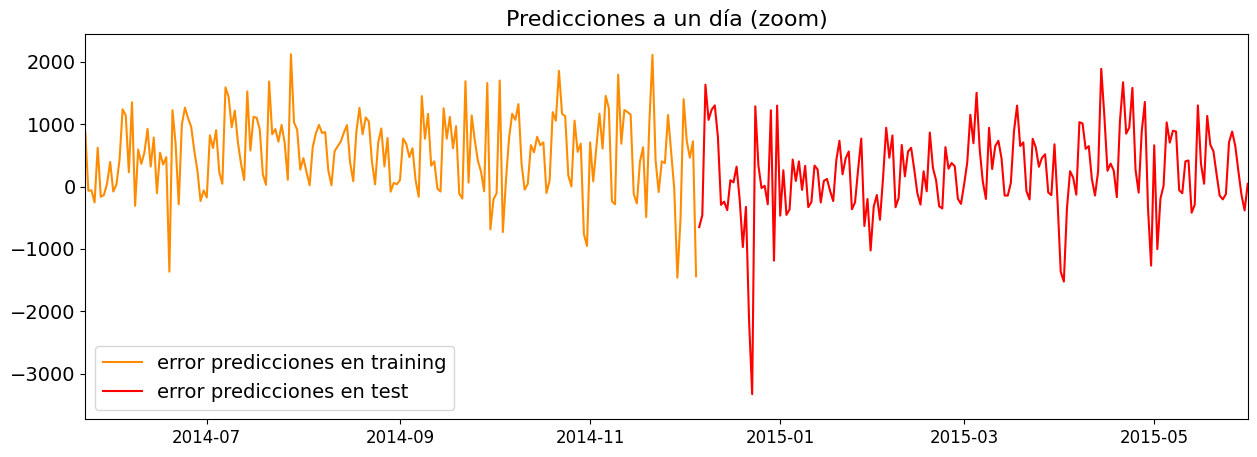

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas_train, target_train_pred - target_train,  c='darkorange',
         label='error predicciones en training')
plt.plot(fechas_test, target_test_pred - target_test,    c='red',
         label='error predicciones en test')
plt.title('Predicciones a un día (zoom)', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlim([fechas_train[500],fechas_test[-1]]);

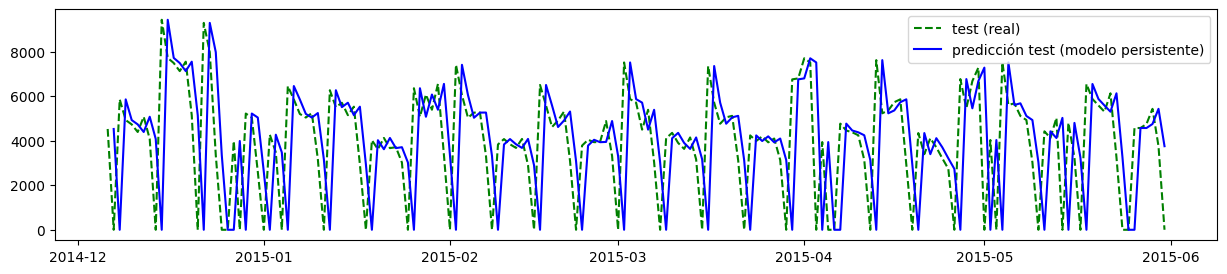

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(fechas_test, target_test, '--',   c='green',
         label='test (real)')
plt.plot(fechas_test[1:], target_test[:-1], '-',   c='blue',
         label='predicción test (modelo persistente)')
plt.legend();

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# =======================
# 1) Métricas (escala original)
# =======================
rmse_train = np.sqrt(mean_squared_error(target_train[1:], target_train_pred[1:]))
rmse_test  = np.sqrt(mean_squared_error(target_test,  target_test_pred))

r2_train   = r2_score(target_train[1:], target_train_pred[1:])
r2_test    = r2_score(target_test,      target_test_pred)

# =======================
# 2) Persistencias y Skill Scores (h = 1, 5, 28)
# =======================
def mse_persist(target, h):
    return mean_squared_error(target[h:], target[:-h])

mse_model = mean_squared_error(target_test, target_test_pred)

mse_p1  = mse_persist(target_test, 1)
mse_p5  = mse_persist(target_test, 5)
mse_p28 = mse_persist(target_test, 28)

skill_1  = 1 - (mse_model / mse_p1)
skill_5  = 1 - (mse_model / mse_p5)
skill_28 = 1 - (mse_model / mse_p28)

# (Opcional) R2 de las persistencias para referencia
r2_p1  = r2_score(target_test[1:],  target_test[:-1])
r2_p5  = r2_score(target_test[5:],  target_test[:-5])
r2_p28 = r2_score(target_test[28:], target_test[:-28])

# =======================
# 3) Hiperparámetros (solo los 4 que queremos registrar)
# =======================
try:   neurons  = model.layers[0].units
except: neurons = None
dropout    = getattr(model.layers[0], "dropout", 0.0)
lookback   = lookback          # ya definido en tu notebook
batch_size = batch_size        # ya definido en tu notebook

# =======================
# 4) Registro para el DataFrame
# =======================
res = {
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "lookback": lookback,
    "neurons": neurons,
    "dropout": dropout,
    "batch_size": batch_size,
    "optimizer": opt.__class__.__name__,
    "R2_train": r2_train,
    "R2_test": r2_test,
    "RMSE_train": rmse_train,
    "RMSE_test": rmse_test,
    "Skill_1d": skill_1,
    "Skill_5d": skill_5,
    "Skill_28d": skill_28,
    "R2_persist_1d": r2_p1,
    "R2_persist_5d": r2_p5,
    "R2_persist_28d": r2_p28,
}

try:
    resultados = pd.concat([resultados, pd.DataFrame([res])], ignore_index=True)
except NameError:
    resultados = pd.DataFrame([res])

display(resultados.tail(10))


,timestamp,lookback,neurons,dropout,batch_size,R2_train,R2_test,RMSE_train,RMSE_test,Skill_1d,Skill_5d,Skill_28d,R2_persist_1d,R2_persist_5d,R2_persist_28d,optimizer
0,2025-09-13 18:13:02,14,5,0.0,32,0.937874,0.895436,645.635738,749.706541,0.941387,0.955956,0.830850,-0.774443,-1.35943,0.296835,NaN
1,2025-09-13 18:24:51,14,5,0.0,32,0.911740,0.889149,769.542941,771.916203,0.937863,0.953307,0.820680,-0.774443,-1.35943,0.296835,RMSprop
2,2025-09-13 18:29:35,14,5,0.0,7,0.953792,0.894396,556.810454,753.425257,0.940804,0.955518,0.829168,-0.774443,-1.35943,0.296835,Adam
3,2025-09-13 18:33:00,14,5,0.0,14,0.936421,0.894024,653.139756,754.753215,0.940596,0.955361,0.828565,-0.774443,-1.35943,0.296835,Adam
4,2025-09-13 18:36:11,14,5,0.0,32,0.941163,0.885881,628.312240,783.213090,0.936031,0.951931,0.815393,-0.774443,-1.35943,0.296835,Adam
5,2025-09-13 18:38:59,7,5,0.0,64,0.937290,0.904027,647.946954,718.249274,0.946203,0.959574,0.844747,-0.774443,-1.35943,0.296835,Adam


In [ ]:
#import pandas as pd

#resultados = pd.read_csv("./data/resultados_lstm.csv")

In [ ]:
# Modelos de referencia: modelo persistente (a 1 día, 7 días etc.)
# Lo que intentamos capturar aquí son cosas como "hoy es domingo, vamos a ver qué tal predice lo de mañana Lunes.. luego al próximo domingo.. luego al próximo domingo del siguiente mes... y luego al mismo domingo pero del año que viene, si está capturando algo de todo el año.. de un domingo a un lunes las cosas pueden cambiar mucho!"
# R2 scores
print("R2 del modelo en training      : ",
      R2_score(target_train[1:], target_train_pred[1:]))
print("R2 del modelo en test          : ",
      R2_score(target_test, target_test_pred))
print("R2 modelo persistente 1 día    : ",
      R2_score(target_test[1:], target_test[:-1]))
print("R2 modelo persistente 1 semana : ",
      R2_score(target_test[7:], target_test[:-7]))
print("R2 modelo persistente 4 semanas: ",
      R2_score(target_test[28:], target_test[:-28]))
print("R2 modelo persistente 1 año: ",
      R2_score(target_train[7*52:], target_train[:-7*52]))

R2 del modelo en training      :  0.9372897267390281
R2 del modelo en test          :  0.9040268412836673
R2 modelo persistente 1 día    :  -0.7744426971461007
R2 modelo persistente 1 semana :  0.09031044639919739
R2 modelo persistente 4 semanas:  0.2968352214432024
R2 modelo persistente 1 año:  0.13122544466627095


In [ ]:
# R2(y_real, y_predicho) = 1 - MSE/VAR(y real)
# r2(v1, v2) # correlación lineal

# r2(precio en euros, precio en céntimos de euros) = 1.
# ** R2(precio en euros, precio en céntimos de euros) = 1 - promedio((precio1-precio2)^2)/VAR(precio1) << -1

In [ ]:
# RMSEs
sqrt = np.sqrt
print("RMSE del modelo en training      : ",
      sqrt(mean_squared_error(target_train[1:],
                              target_train_pred[1:])))
print("RMSE del modelo en test          : ",
      sqrt(mean_squared_error(target_test,
                              target_test_pred)))
print("RMSE modelo persistente 1 día    : ",
      sqrt(mean_squared_error(target_test[1:],
                              target_test[:-1])))
print("RMSE modelo persistente 1 semana : ",
      sqrt(mean_squared_error(target_test[7:],
                              target_test[:-7])))
print("RMSE modelo persistente 4 semanas: ",
      sqrt(mean_squared_error(target_test[28:],
                              target_test[:-28])))

RMSE del modelo en training      :  647.9469542426294
RMSE del modelo en test          :  718.2492739259221
RMSE modelo persistente 1 día    :  3096.6731965713843
RMSE modelo persistente 1 semana :  2229.5263108086965
RMSE modelo persistente 4 semanas:  1822.868949774967


## <font color="#CA3532"> **9. Predicciones a varios días en test mediante un modelo generativo**

In [ ]:
def step_generativo(model, ventana, X, i):
    # ventana: va a tener dimensiones (1, lookback, n_variables)
    # El target está en (0,:,0)
    # La posición (0,0,0) es el target en el día más antiguo de la ventana
    # La posición (0,0,-1) es el target en el día más reciente de la ventana
    # Las variables calendario están en (0,:,1:)
    # Las variables calendario para el último día de la ventana están en (0,-1,1:)

    z = model.predict(ventana, verbose=0)[0,0] # predicción nueva
    target_pred = inverse_transform_y(z) #usamos la nueva función que MinMax a Train e inverse
    ventana_nueva = None
    if i < (len(X)-1):
        ventana_nueva = np.zeros(ventana.shape)
        # muevo un día hacia atrás todas las variables de la ventana:
        ventana_nueva[0,:-1,:] = ventana[0,1:,:].copy()

        # introduzco las variables calendario para el último día de la ventana:
        ventana_nueva[0,-1,1:] = X[i+1,-1,1:]

        # meto la predicción como última obervación del target:
        ventana_nueva[0,-1,0] = z


    return target_pred, ventana_nueva

In [ ]:
def generativo(model, X):
    ventana = np.array([X[0]]).copy()
    salidas = []
    for i in range(len(X)):
        target_pred, ventana_nueva = step_generativo(model, ventana, X, i)
        salidas.append(target_pred)
        ventana = ventana_nueva

    return salidas

In [ ]:
sal = generativo(model, X_test)

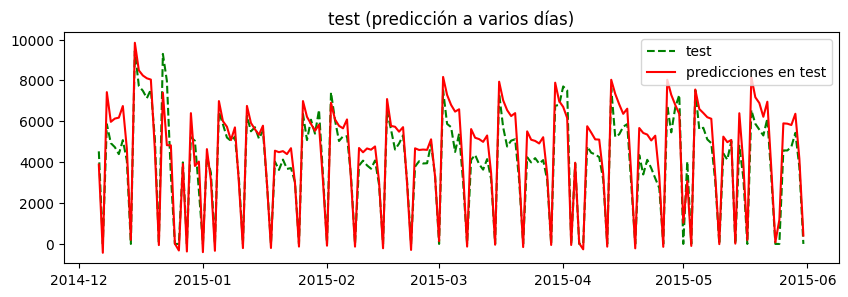

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)
ax.plot(fechas_test, target_test, '--g', label='test')
plt.plot(fechas_test, sal, 'r', label='predicciones en test')
plt.title('test (predicción a varios días)')
plt.legend();

In [ ]:
preds = pd.DataFrame({"fecha": fechas_test,
                      "Sales estimados":sal})
preds.to_csv("predicciones.csv")
preds

,fecha,Sales estimados
0,2014-12-06,[3879.5857]
1,2014-12-07,[-432.52927]
2,2014-12-08,[7425.8745]
3,2014-12-09,[5974.113]
4,2014-12-10,[6132.214]
...,...,...
172,2015-05-27,[5883.017]
173,2015-05-28,[5818.0566]
174,2015-05-29,[6368.452]
175,2015-05-30,[4168.752]
